In [1]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram

正解となるビット列を指定

In [2]:
#求めたいビット列
a = '100101'

量子回路の用意

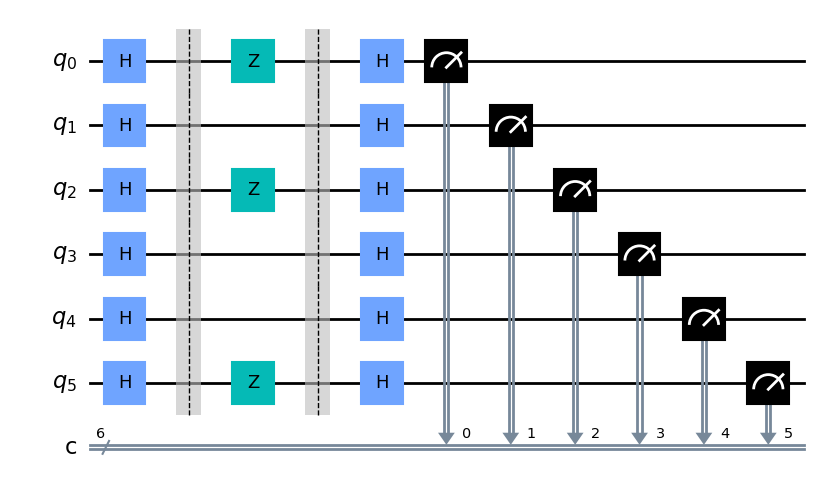

In [8]:
#オラクルを用意
def oracle(qc, a):
    for i, s in enumerate(reversed(a)):
        if s =='1':
            qc.z(i)

n = len(a)

#回路の用意
qc = QuantumCircuit(n, n)

for i in range(n):
    qc.h(i)
qc.barrier()
oracle(qc, a)
qc.barrier()
for i in range(n):
    qc.h(i)

for i in range(n):
    qc.measure(i, i)

qc.draw(output='mpl')

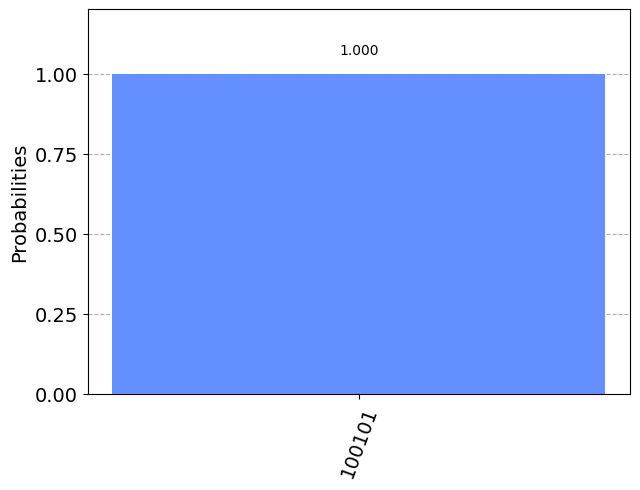

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 1042
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)